*"Люди — визуальные существа. Бесчисленные исследования показывают, как наш мозг настроен на визуальное восприятие и быстрее обрабатывает все, что проходит через глаза."*

# Matplotlib

In [1]:
import matplotlib.pyplot as plt

Matplotlib - основная библиотека для визуализации данных. Matplotlib эмулирует графики и визуализации из Matlab (если кто-то вообще слышал об этой штуке).

## А зачем?

### Немного математической статистики

Закон больших чисел - одна из фундаментальных теорем математической статистики, которая используется в машинном обучении. 

Говорят, что последовательность случайных величин $\xi_1, \xi_2, \dots, \xi_n$ с конечными первыми моментами удовлетворяет закону больших чисел (ЗБЧ), если
$$\frac{\xi_1 + \xi_2 + \dots + \xi_n}{n}-\frac{E\xi_1 + \dots + E\xi_n}{n} \xrightarrow[]{P}
 0, \text{при } n \rightarrow \infty$$

Звучит сложно, но на деле все максимально просто.

Эмулируем большое количество бросков кубика

In [2]:
import numpy as np

size = 1000
num_exp = [i+1 for i in range(size)]
dice_roll = np.random.randint(1, 7, size=size)

In [3]:
means = []
for i in range(len(dice_roll)):
    means.append(np.mean(dice_roll[:i+1]))
means

[4.0,
 4.0,
 4.0,
 3.75,
 3.2,
 3.0,
 3.4285714285714284,
 3.625,
 3.3333333333333335,
 3.4,
 3.5454545454545454,
 3.6666666666666665,
 3.4615384615384617,
 3.5714285714285716,
 3.533333333333333,
 3.5,
 3.6470588235294117,
 3.611111111111111,
 3.5789473684210527,
 3.6,
 3.7142857142857144,
 3.6363636363636362,
 3.6956521739130435,
 3.5833333333333335,
 3.64,
 3.5384615384615383,
 3.4814814814814814,
 3.4642857142857144,
 3.4482758620689653,
 3.4,
 3.3548387096774195,
 3.3125,
 3.3636363636363638,
 3.3529411764705883,
 3.2857142857142856,
 3.361111111111111,
 3.2972972972972974,
 3.3684210526315788,
 3.4358974358974357,
 3.475,
 3.4390243902439024,
 3.380952380952381,
 3.395348837209302,
 3.4545454545454546,
 3.488888888888889,
 3.4565217391304346,
 3.4468085106382977,
 3.4791666666666665,
 3.5306122448979593,
 3.56,
 3.607843137254902,
 3.576923076923077,
 3.6037735849056602,
 3.6481481481481484,
 3.6545454545454548,
 3.625,
 3.5789473684210527,
 3.603448275862069,
 3.6271186440677967

In [4]:
etalon = np.mean([1,2,3,4,5,6])
etalon

3.5

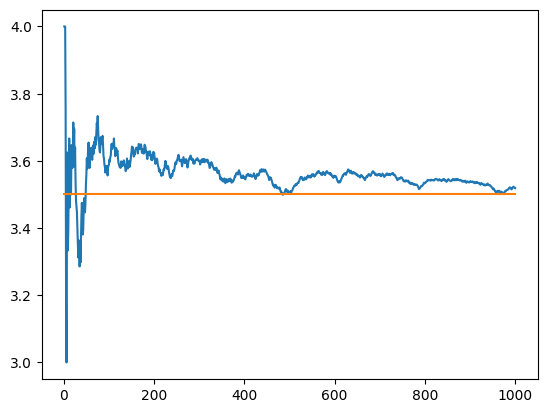

In [5]:
plt.plot(num_exp, means)
plt.plot(num_exp, [etalon for _ in num_exp])
plt.show()

А можем сделать красивее!

Базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

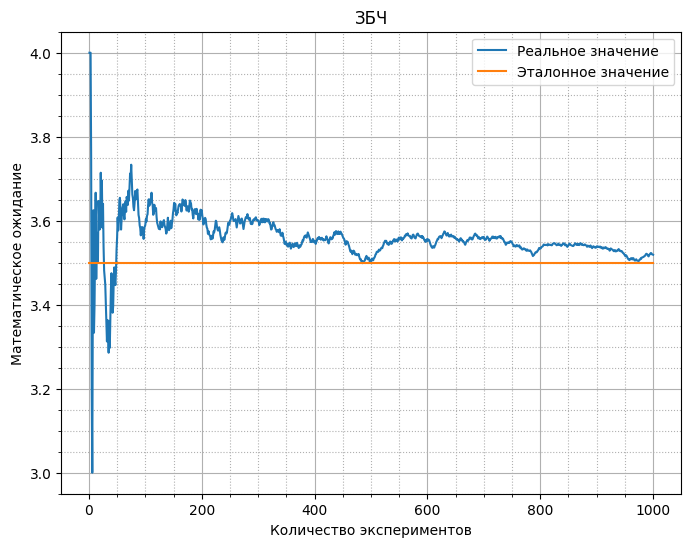

In [6]:
# задаем размер графика
plt.figure(figsize=(8, 6))
plt.plot(num_exp, means, label="Реальное значение")
plt.plot(num_exp, [etalon for _ in num_exp], label="Эталонное значение")
# выводим легенду
plt.legend()
# подписываем название графика
plt.title('ЗБЧ')
# подписываем название осей
plt.xlabel('Количество экспериментов')
plt.ylabel('Математическое ожидание')
# включаем дополнительные отметки на осях
plt.minorticks_on()
# включаем основную сетку
plt.grid(which='major')
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.show()

*Распределение вероятностей* — это закон, описывающий область значений случайной величины и соответствующие вероятности появления этих значений.

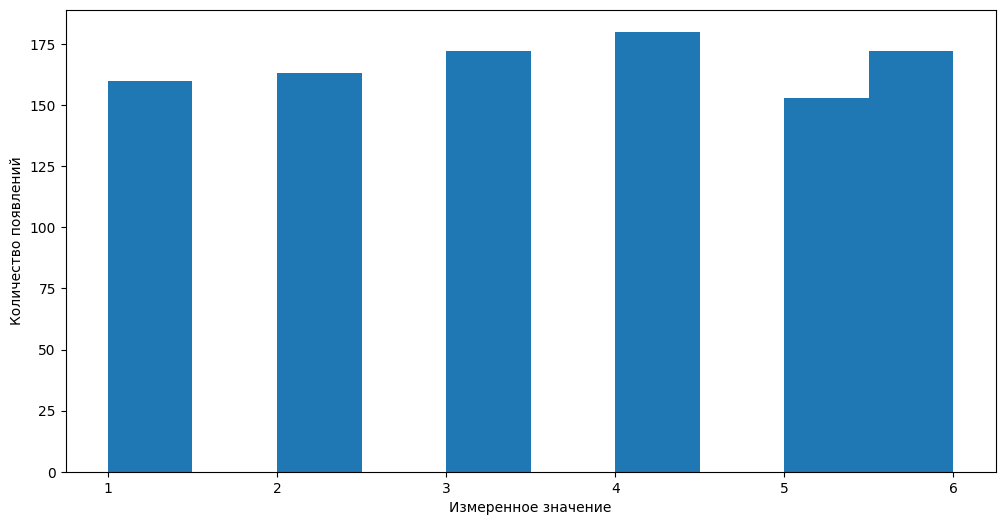

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(dice_roll)
plt.xlabel('Измеренное значение')
plt.ylabel('Количество появлений')
plt.show()

### Нормальное распределение

![Эталонное нормальное распределение](2.jpeg)

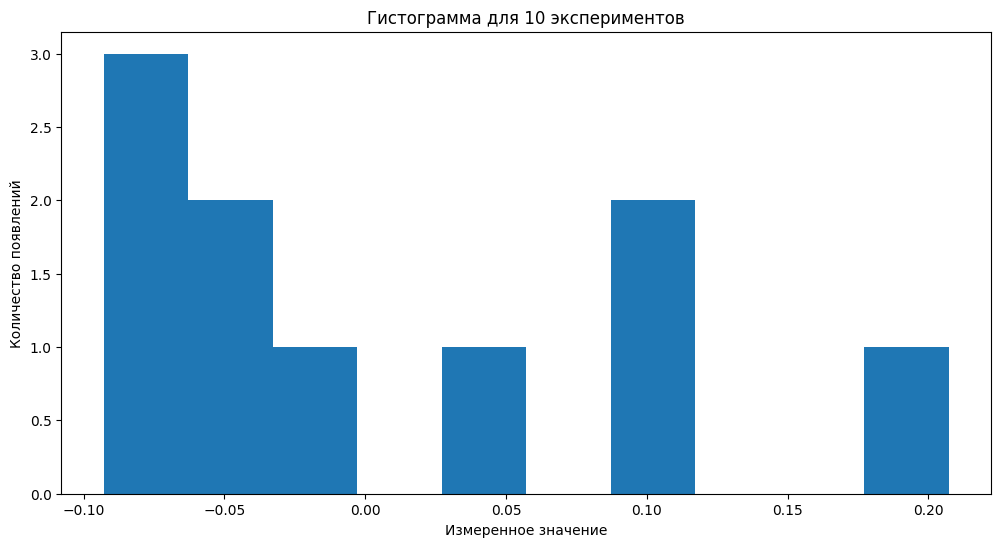

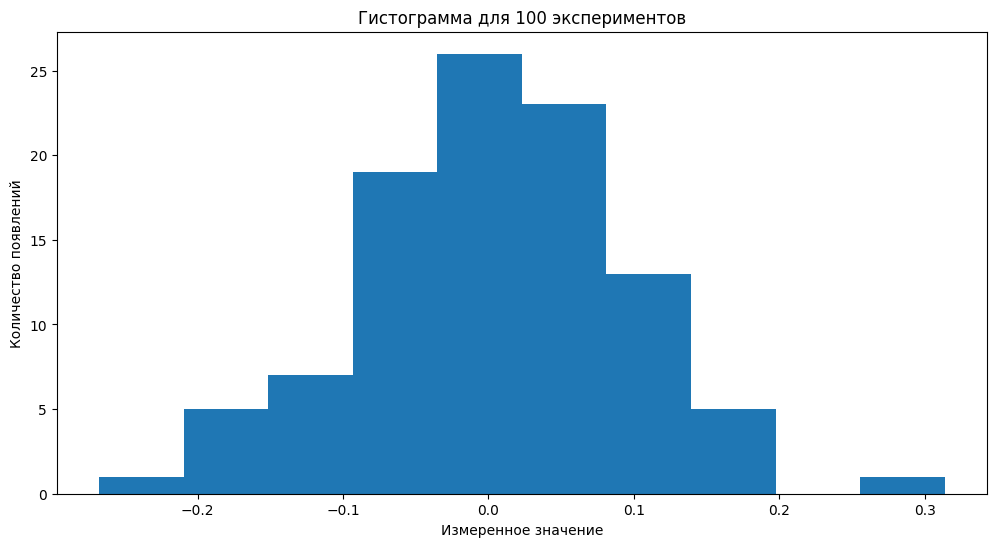

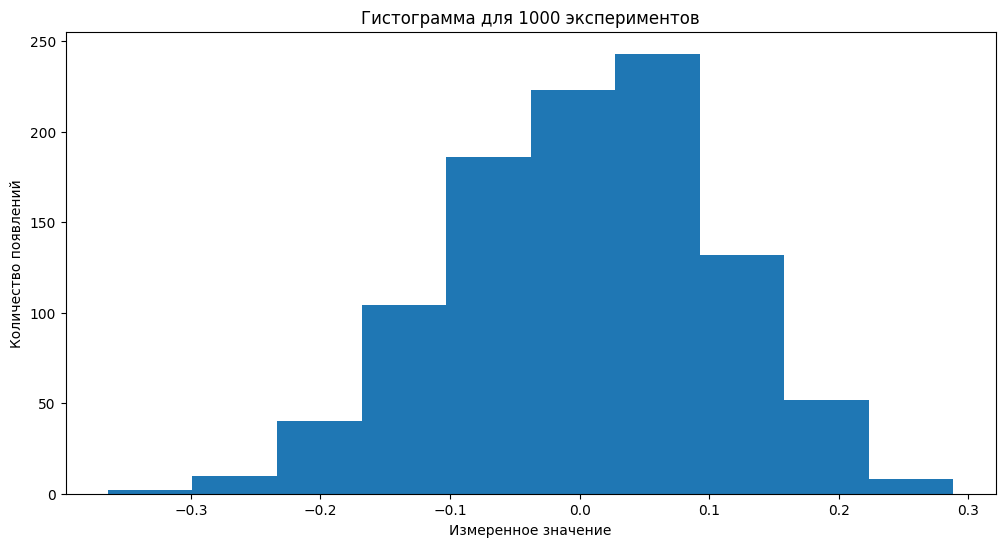

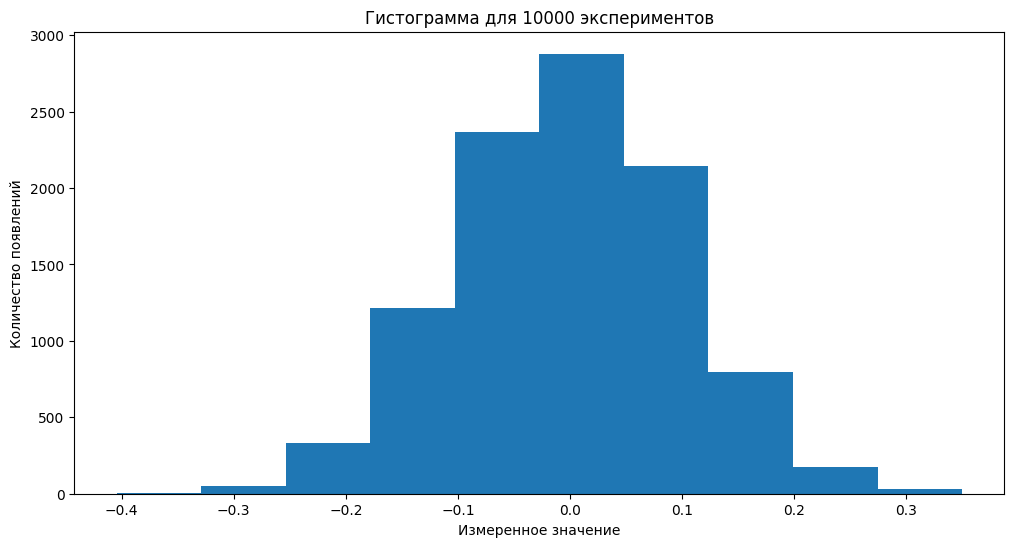

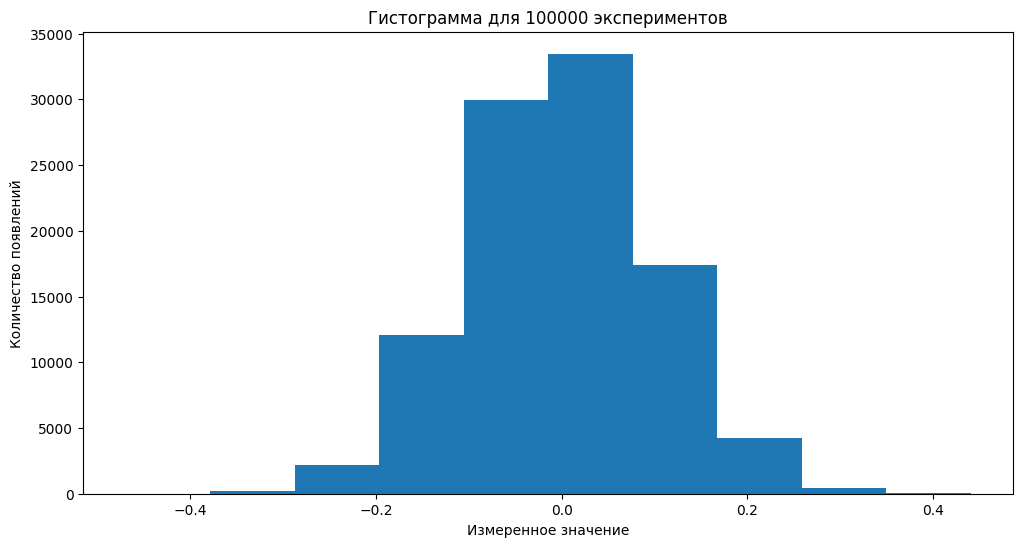

In [8]:
num_values = [10, 100, 1000, 10000, 100000]
for num in num_values:
    plt.figure(figsize=(12, 6))
    plt.title(f'Гистограмма для {num} экспериментов')
    plt.xlabel('Измеренное значение')
    plt.ylabel('Количество появлений')
    plt.hist(np.random.normal(0, 0.1, num))
    plt.show()

## А что можно посмотреть в реальных данных?

In [9]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives,Survived
0,3,male,22.0,1,0,7.2500,s,mr,braund,a5,21171,1,0.0
1,1,female,38.0,1,0,71.2833,c,mrs,cumings,pc,17599,1,1.0
2,3,female,26.0,0,0,7.9250,s,miss,heikkinen,stono2,3101279,0,1.0
3,1,female,35.0,1,0,53.1000,s,mrs,futrelle,NoPre,113803,1,1.0
4,3,male,35.0,0,0,8.0500,s,mr,allen,NoPre,373450,0,0.0


### Распределение данных

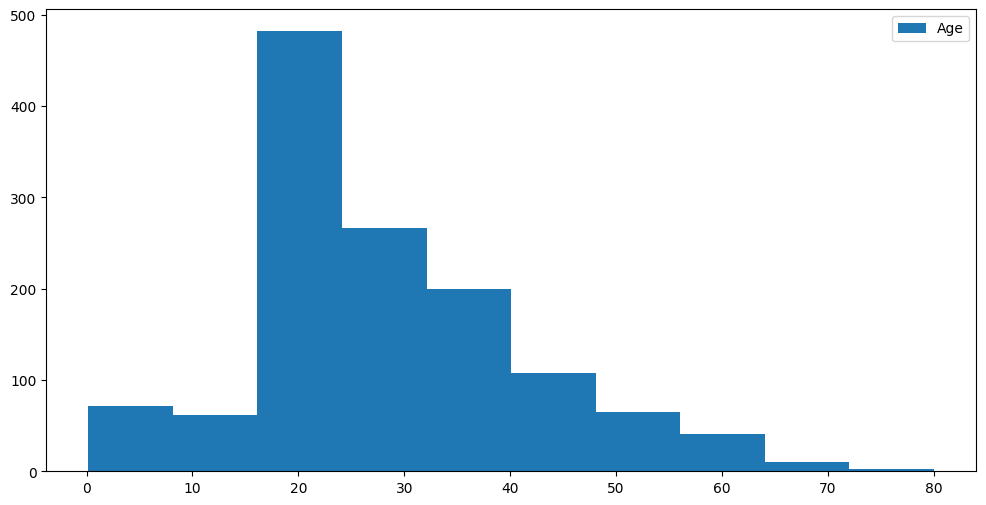

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], label="Age")
plt.legend()
plt.show()

### Взаимосвязь данных и поиск выбросов и аномалий

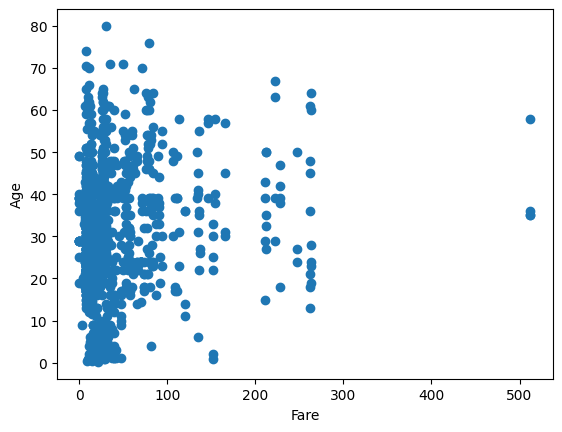

In [11]:
plt.scatter(df['Fare'], df['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

*Выброс* - ошибка в данных (ваш вес 80т)

*Аномалия* - реальные данные, отклоняющиеся от нормы (ЗП Марка Цукерберга)

# Seaborn

![Seaborn mem](3.jpeg)

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Seaborn - это крутая надстройка над matplotlib'ом, которая позволяет в две-три строки качественно визуализировать данные. По сути переопределяет всё имеющееся в matplotlib и дополняет его. А также имеет несколько собственных графиков, упрощающих визуальный анализ данных

## Общие графики с matplotlib

Распределение возрастов людей, переведенных в собачьи года (нам было нечего делать)

<Axes: xlabel='Doge_Age', ylabel='Count'>

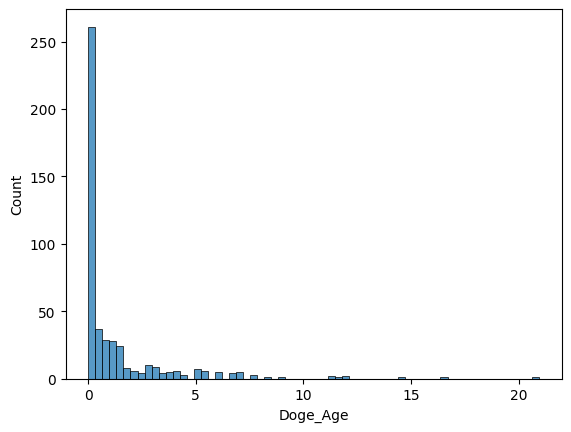

In [13]:
df['Doge_Age'] = ((df['Age'] - 31) / 16) ** np.e
sns.histplot(df['Doge_Age'])

<Axes: xlabel='Age', ylabel='Fare'>

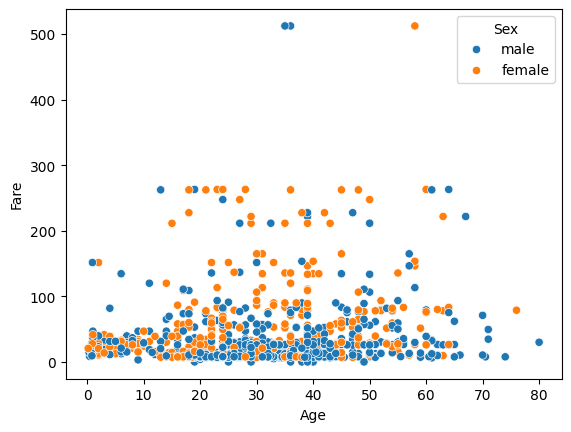

In [14]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Sex')

<Axes: xlabel='Age', ylabel='Fare'>

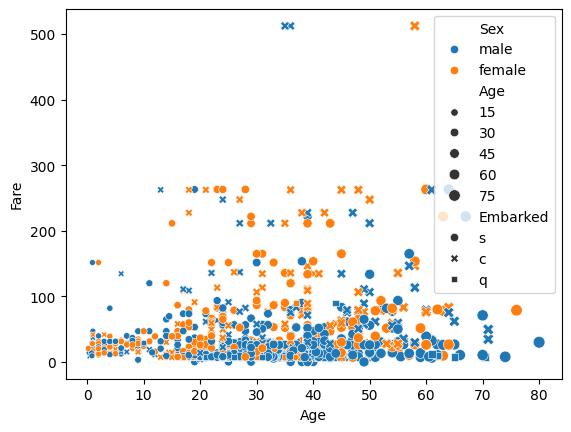

In [22]:
sns.scatterplot(data=df, x='Age', y='Fare', color='green', hue='Sex', size='Age', style='Embarked')

## Собственные графики seaborn

<Axes: xlabel='Embarked', ylabel='count'>

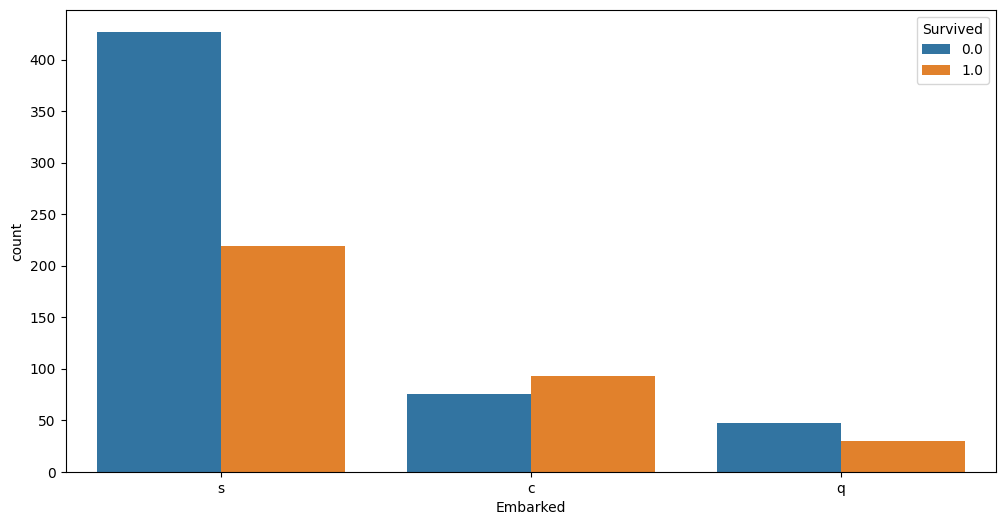

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x="Embarked", hue='Survived', legend='full')

In [25]:
df.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare,TicketNum_Groups,Relatives,Survived,Doge_Age
Pclass,1.000000,-0.449693,0.060832,0.018322,-0.558740,0.285849,0.050027,-0.338481,-0.173455
Age,-0.449693,1.000000,-0.198653,-0.129467,0.201170,-0.114027,-0.201428,-0.046230,0.871434
SibSp,0.060832,-0.198653,1.000000,0.373587,0.160388,0.021203,0.861952,-0.035322,0.013738
Parch,0.018322,-0.129467,0.373587,1.000000,0.221668,-0.039456,0.792296,0.081629,-0.006290
Fare,-0.558740,0.201170,0.160388,0.221668,1.000000,-0.158505,0.226653,0.257307,0.082337
TicketNum_Groups,0.285849,-0.114027,0.021203,-0.039456,-0.158505,1.000000,-0.007619,-0.096303,-0.115518
Relatives,0.050027,-0.201428,0.861952,0.792296,0.226653,-0.007619,1.000000,0.016639,0.001537
Survived,-0.338481,-0.046230,-0.035322,0.081629,0.257307,-0.096303,0.016639,1.000000,-0.084078
Doge_Age,-0.173455,0.871434,0.013738,-0.006290,0.082337,-0.115518,0.001537,-0.084078,1.000000


### Визуализация таблиц с числовыми данными

<Axes: >

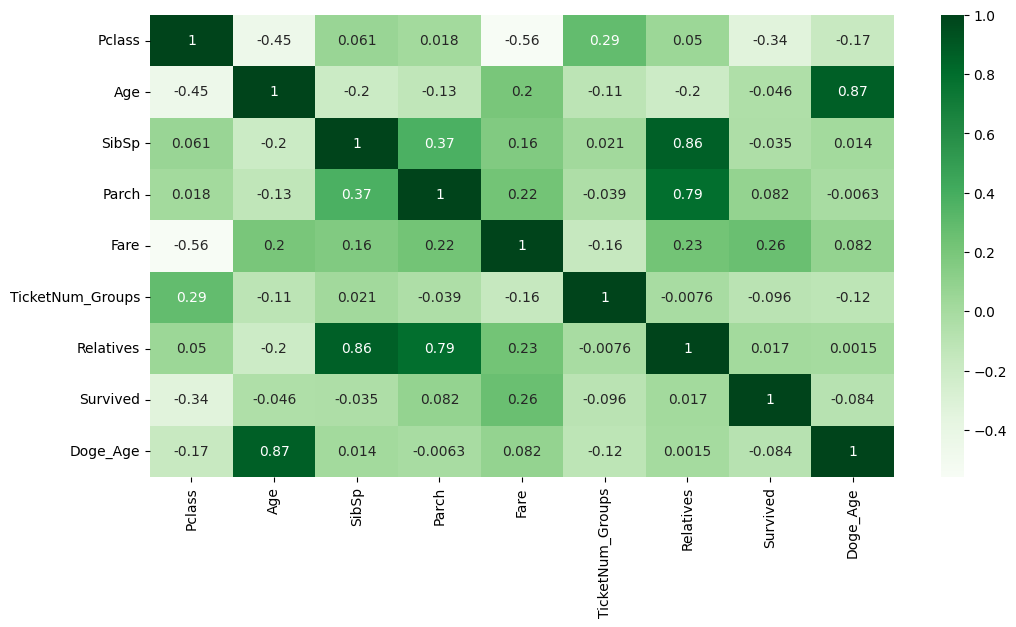

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')

### Нужно больше информации

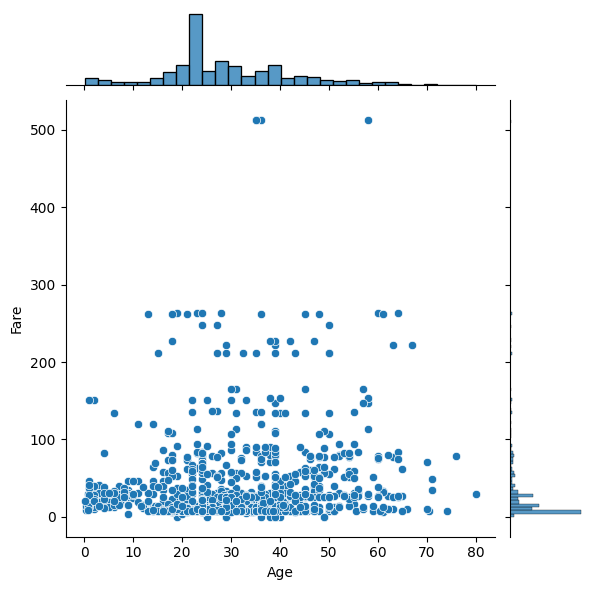

In [31]:
sns.jointplot(data=df, x = "Age", y = "Fare", kind='scatter')

In [23]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,TicketNum_Groups,Relatives,Survived,Doge_Age
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1.309000e+03,1309.000000,891.000000,474.000000
mean,2.294882,29.207540,0.498854,0.385027,33.276193,2.841326e+05,0.883881,0.383838,1.263089
std,0.837836,13.172381,1.041658,0.865560,51.743584,6.352097e+05,1.583639,0.486592,2.426934
min,1.000000,0.170000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,1.390500e+04,0.000000,0.000000,0.042351
50%,3.000000,26.000000,0.000000,0.000000,14.454200,1.113200e+05,0.000000,0.000000,0.209297
75%,3.000000,37.000000,1.000000,0.000000,31.275000,3.470770e+05,1.000000,1.000000,1.327807
max,3.000000,80.000000,8.000000,9.000000,512.329200,3.101315e+06,10.000000,1.000000,20.955201


<Axes: ylabel='Age'>

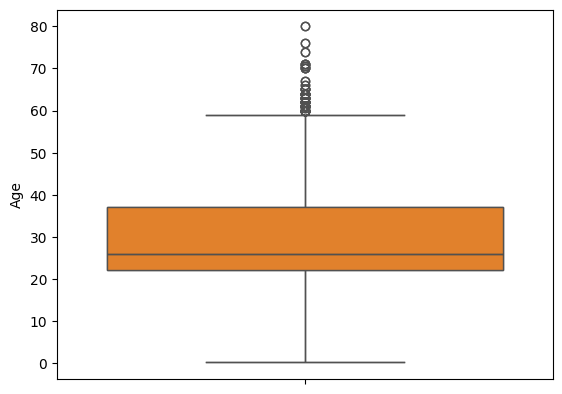

In [27]:
sns.boxplot(df['Age'])
sns.boxplot(data=df, y='Age')

<Axes: xlabel='Sex', ylabel='Age'>

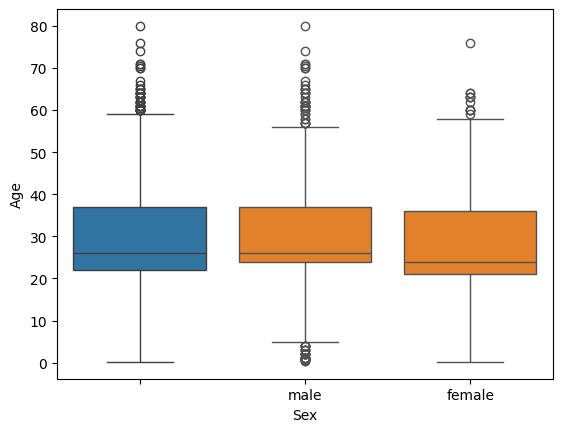

In [28]:
sns.boxplot(df['Age'])
sns.boxplot(data=df, x='Sex', y='Age')

![Скрипичный график](1.jpg)

<Axes: ylabel='Age'>

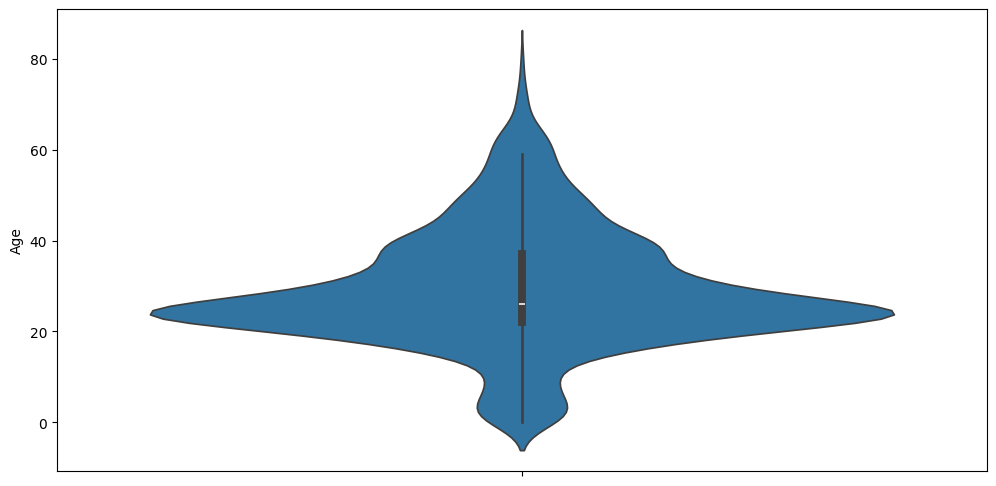

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, y='Age')

<Axes: xlabel='Sex', ylabel='Age'>

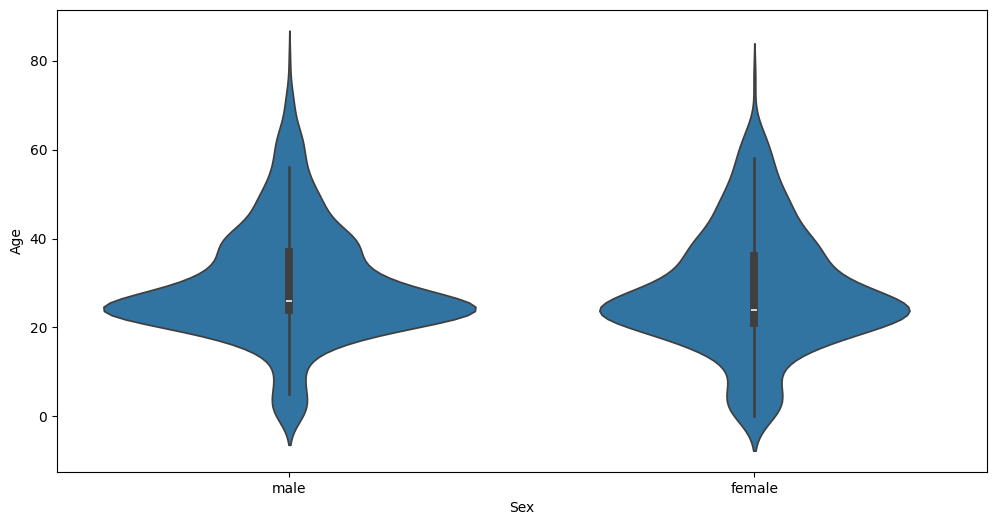

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Sex', y='Age')